# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [177]:
bank_full_campaign_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [178]:
bank_full_campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [179]:
bank_full_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Verify Nulls in the Data Frame

In [180]:

bank_full_campaign_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [181]:
bank_full_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Business Objective

In this analysis, I compare several classifiers including K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines. The objective is to predict the outcome of a bank promotions campaign for individuals.

Get the Objective from Abstract.
The business objective is to find a model that explains the success of a contact, improving campaign efficiency and resource management while selecting potential buying customers effectively.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [182]:
bank_full_campaign_df.describe()
given_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [183]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Apply binary encoding to each column
binary_columns = ['housing', 'y']
encoder = LabelBinarizer()
for column in binary_columns:
    bank_full_campaign_df[column] = encoder.fit_transform(bank_full_campaign_df[column])
    
# label encoder
categorical_columns = ['job', 'marital', 'education', 'default', 'loan']
encoder = LabelEncoder()
bank_full_campaign_df[categorical_columns] = 1+bank_full_campaign_df[categorical_columns].apply(encoder.fit_transform)

In [184]:
bank_data_with_given_features = bank_full_campaign_df[given_features]

for column in bank_data_with_given_features:
    print(column, "=>", bank_data_with_given_features[column].unique())

age => [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job => [ 4  8  1  2 10  6  5 11  7 12  3  9]
marital => [2 3 1 4]
education => [1 4 2 3 6 8 7 5]
default => [1 2 3]
housing => [1 0]
loan => [1 3 2]
y => [0 1]


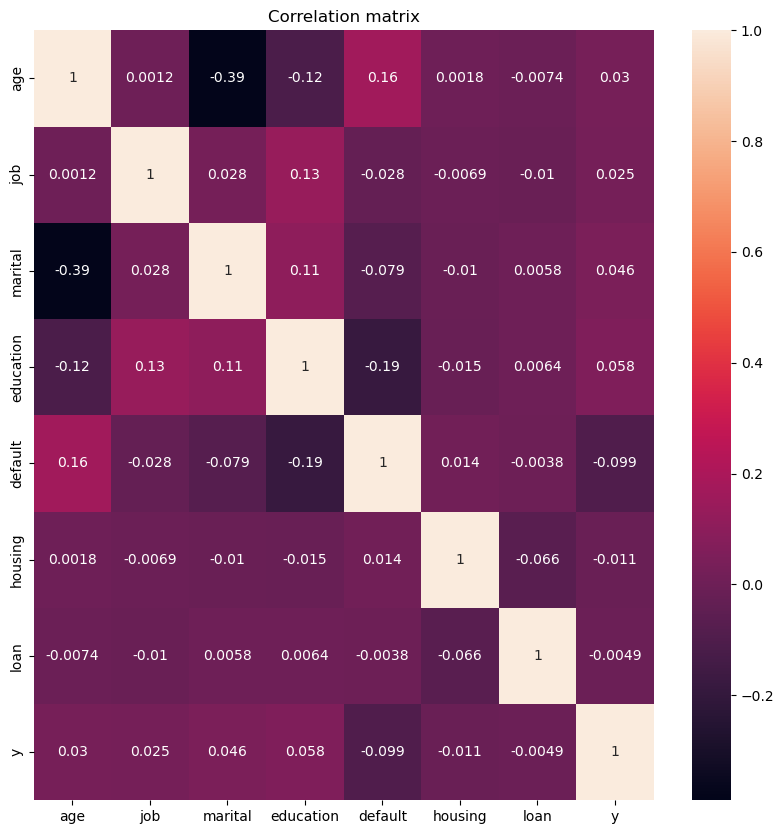

In [185]:
# Feature correlation
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(bank_data_with_given_features.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [186]:
# Split the data
X = bank_data_with_given_features.drop('y', axis=1)
y = bank_data_with_given_features['y']

# Apply standard scalar for each column
columns = X.columns 
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])


In [187]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [188]:
# Create a baseline model using a majority class classifier
baseline_model = DummyClassifier(strategy='most_frequent')

In [189]:
# Train the baseline model
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [190]:
# Make predictions using the baseline model
baseline_predictions = baseline_model.predict(X_test)

In [191]:
# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8875940762320952


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [192]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an instance of Linear Regression
regressor = LogisticRegression()

# Start the timer
start_time = time.time()
# Fit the model on the training data
regressor.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [193]:
# Evaluate the model
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)
                              
# Print the test accuracy
print("Logistic Regression Train accuracy: ", train_accuracy) 
print("Logistic Regression Test accuracy: ", test_accuracy)                

Logistic Regression Train accuracy:  0.8872394297804447
Logistic Regression Test accuracy:  0.8875940762320952


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [194]:
# Logistic Regression

# Create a DataFrame for results
results = pd.DataFrame({'Model': ['Logistic Regression'],
                        'Train Time': [training_time],
                        'Train Accuracy': [train_accuracy],
                        'Test Accuracy': [test_accuracy]})
            
# Print the test accuracy
print("Logistic Regression Train accuracy: ", train_accuracy) 
print("Logistic Regression Test accuracy: ", test_accuracy) 

Logistic Regression Train accuracy:  0.8872394297804447
Logistic Regression Test accuracy:  0.8875940762320952


In [195]:
# KNN model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()
# Start the timer
start_time = time.time()
# Fit the model on the training data
knn.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

knn_results = {'Model': 'KNN Model',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}

results = results.append(knn_results, ignore_index=True)

# Print the test accuracy
print("Knn Train accuracy: ", train_accuracy)
print("Knn Test accuracy: ", test_accuracy)

Knn Train accuracy:  0.8893205230481079
Knn Test accuracy:  0.8773974265598447


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_78261/4119986636.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(knn_results, ignore_index=True)


In [196]:
# SVM Model
svm = SVC()
# Start the timer
start_time = time.time()
# Fit the model on the training data
svm.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

svm_results = {'Model': 'SVM Model',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}

results = results.append(svm_results, ignore_index=True)

print("SVM Train accuracy: ", train_accuracy)
print("SVM Test accuracy: ", test_accuracy)

SVM Train accuracy:  0.8873434844438278
SVM Test accuracy:  0.8875940762320952


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_78261/2969276855.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(svm_results, ignore_index=True)


In [197]:
# Decision Tree Model
# Fit and time the Decision Tree model
dt = DecisionTreeClassifier()
start_time = time.time()
# Fit the model on the training data
dt.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)

model_results = {'Model': 'Decision Tree Model',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}
results = results.append(model_results, ignore_index=True)

print("Decision Tree Train accuracy: ", train_accuracy)
print("Decision Tree Test accuracy: ", test_accuracy)

Decision Tree Train accuracy:  0.9179702403662724
Decision Tree Test accuracy:  0.8615359715141215


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_78261/2340854023.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [198]:
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.025530,0.887239,0.887594
1,KNN Model,0.011165,0.889321,0.877397
2,SVM Model,12.184902,0.887343,0.887594
3,Decision Tree Model,0.033068,0.917970,0.861536


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [199]:
%%time
# Logistic Regression

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


lr_params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
lr_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_params, scoring='accuracy', cv=5)
start_time = time.time()
# Fit the model on the training data
lr_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best estimator from the GridSearchCV object
best_model = lr_grid.best_estimator_
best_params = lr_grid.best_params_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
predictions = lr_grid.predict(X_test)


model_results = {'Model': 'Logistic Regression (Tuned)',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy }

results = results.append(model_results, ignore_index=True)

print("Logistic Regression Best Params:", best_params)

Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: user 2.65 s, sys: 4.29 s, total: 6.94 s
Wall time: 756 ms


<timed exec>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [200]:
%%time
## KNN model
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params, scoring='accuracy', cv=5, verbose = 3)
start_time = time.time()
# Fit the model on the training data
knn_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best estimator from the GridSearchCV object
best_model = knn_grid.best_estimator_
best_params = knn_grid.best_params_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

model_results = {'Model': 'KNN Model (Tuned)',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}
results = results.append(model_results, ignore_index=True)

print("KNN Best Score:", knn_grid.best_score_)  
print("KNN Regression Train accuracy: ", train_accuracy)
print("KNN Regression Test accuracy: ", test_accuracy)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.854 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.862 total time=   0.1s
[CV 3/5] END .....................n_neighbors=3;, score=0.860 total time=   0.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.865 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.864 total time=   0.1s
[CV 1/5] END .....................n_neighbors=5;, score=0.873 total time=   0.1s
[CV 2/5] END .....................n_neighbors=5;, score=0.878 total time=   0.1s
[CV 3/5] END .....................n_neighbors=5;, score=0.877 total time=   0.1s
[CV 4/5] END .....................n_neighbors=5;, score=0.877 total time=   0.1s
[CV 5/5] END .....................n_neighbors=5;, score=0.875 total time=   0.1s
[CV 1/5] END .....................n_neighbors=7;, score=0.883 total time=   0.1s
[CV 2/5] END .....................n_neighbors=7;,

<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [201]:
%%time
## Decision Tree model
dt_params = {'max_depth': [None, 3, 5], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_params, scoring='accuracy', cv=5)
start_time = time.time()
# Fit the model on the training data
dt_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best estimator from the GridSearchCV object
best_model = dt_grid.best_estimator_
best_params = dt_grid.best_params_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

model_results = {'Model': 'Decision Tree Model (Tuned)',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}
results = results.append(model_results, ignore_index=True)

print("DT Best Score:", dt_grid.best_score_)  
print("DT Train accuracy: ", train_accuracy)
print("DT Test accuracy: ", test_accuracy)

DT Best Score: 0.8870660336680627
DT Train accuracy:  0.8876209635461829
DT Test accuracy:  0.8874322246499959
CPU times: user 1.45 s, sys: 66.1 ms, total: 1.52 s
Wall time: 1.52 s


<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [202]:
%%time
# SVM linear kernel
svm_grid = GridSearchCV(estimator=SVC(kernel='linear'), param_grid={}, scoring='accuracy', cv=5)
start_time = time.time()
# Fit the model on the training data
svm_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best estimator from the GridSearchCV object
best_model = svm_grid.best_estimator_
best_params = svm_grid.best_params_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

model_results = {'Model': 'SVM (Linear) (Tuned)',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}
results = results.append(model_results, ignore_index=True)

print("SVM Best Score:", svm_grid.best_score_)  
print("SVM Train accuracy: ", train_accuracy)
print("SVM Test accuracy: ", test_accuracy)



SVM Best Score: 0.8872394340495436
SVM Train accuracy:  0.8872394297804447
SVM Test accuracy:  0.8875940762320952
CPU times: user 11.6 s, sys: 223 ms, total: 11.8 s
Wall time: 11.8 s


<timed exec>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [203]:
%%time
# SVM rbf kernel
svm_grid = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid={}, scoring='accuracy', cv=5)
start_time = time.time()
# Fit the model on the training data
svm_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best estimator from the GridSearchCV object
best_model = svm_grid.best_estimator_
best_params = svm_grid.best_params_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

model_results = {'Model': 'SVM (rbf) (Tuned)',
               'Train Time': training_time,
               'Train Accuracy': train_accuracy,
               'Test Accuracy': test_accuracy}
results = results.append(model_results, ignore_index=True)

print("SVM(rbf) Best Score:", svm_grid.best_score_)  
print("SVM(rbf) Train accuracy: ", train_accuracy)
print("SVM(rbf) Test accuracy: ", test_accuracy)

SVM(rbf) Best Score: 0.887239440064125
SVM(rbf) Train accuracy:  0.8873434844438278
SVM(rbf) Test accuracy:  0.8875940762320952
CPU times: user 1min, sys: 777 ms, total: 1min 1s
Wall time: 1min 1s


<timed exec>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [204]:
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.025530,0.887239,0.887594
1,KNN Model,0.011165,0.889321,0.877397
2,SVM Model,12.184902,0.887343,0.887594
3,Decision Tree Model,0.033068,0.917970,0.861536
4,Logistic Regression (Tuned),0.746422,0.887239,0.887594
5,KNN Model (Tuned),1.532300,0.889910,0.885004
6,Decision Tree Model (Tuned),1.512900,0.887621,0.887432
7,SVM (Linear) (Tuned),9.453463,0.887239,0.887594
8,SVM (rbf) (Tuned),51.583529,0.887343,0.887594


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN Model'),
  Text(2, 0, 'SVM Model'),
  Text(3, 0, 'Decision Tree Model'),
  Text(4, 0, 'Logistic Regression (Tuned)'),
  Text(5, 0, 'KNN Model (Tuned)'),
  Text(6, 0, 'Decision Tree Model (Tuned)'),
  Text(7, 0, 'SVM (Linear) (Tuned)'),
  Text(8, 0, 'SVM (rbf) (Tuned)')])

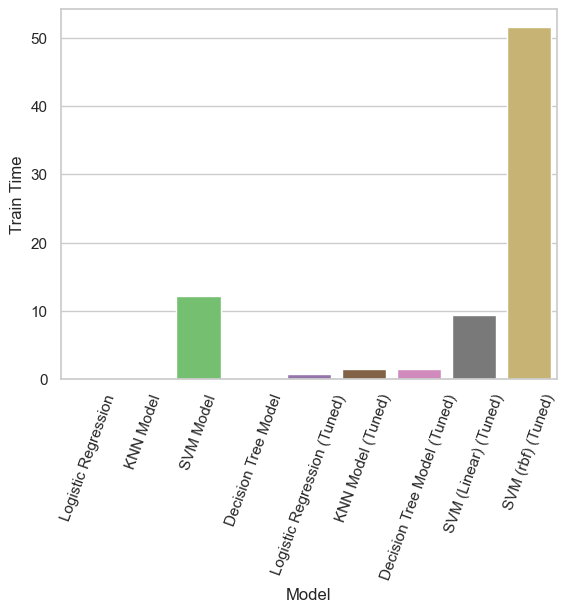

In [221]:

# Create the bar plot
sns.barplot(data=results, x='Model', y='Train Time')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN Model'),
  Text(2, 0, 'SVM Model'),
  Text(3, 0, 'Decision Tree Model'),
  Text(4, 0, 'Logistic Regression (Tuned)'),
  Text(5, 0, 'KNN Model (Tuned)'),
  Text(6, 0, 'Decision Tree Model (Tuned)'),
  Text(7, 0, 'SVM (Linear) (Tuned)'),
  Text(8, 0, 'SVM (rbf) (Tuned)')])

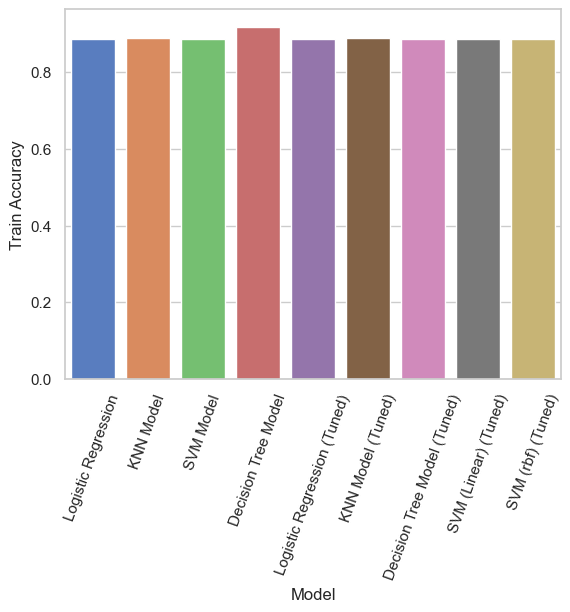

In [218]:

# Create the bar plot
sns.barplot(data=results, x='Model', y='Train Accuracy')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN Model'),
  Text(2, 0, 'SVM Model'),
  Text(3, 0, 'Decision Tree Model'),
  Text(4, 0, 'Logistic Regression (Tuned)'),
  Text(5, 0, 'KNN Model (Tuned)'),
  Text(6, 0, 'Decision Tree Model (Tuned)'),
  Text(7, 0, 'SVM (Linear) (Tuned)'),
  Text(8, 0, 'SVM (rbf) (Tuned)')])

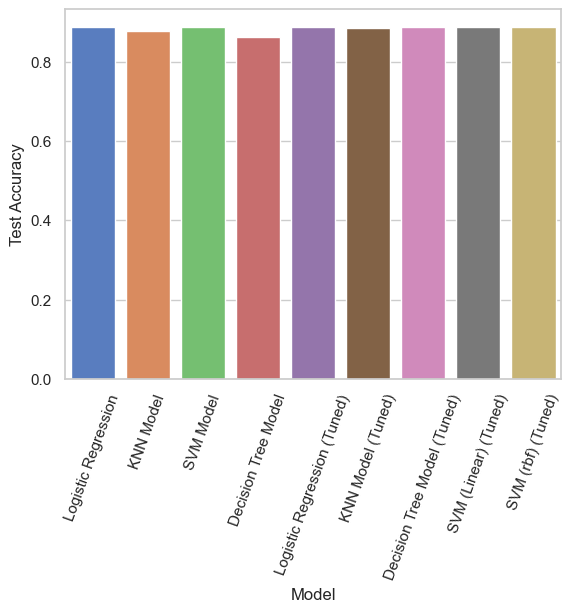

In [220]:

# Create the bar plot
sns.barplot(data=results, x='Model', y='Test Accuracy')
plt.xticks(rotation=70)

### Summary

#### In this project, we have compared the performance of vairious classifiers like Logistic regression, KNN model, SVM (linear), SVM (rbf) and Decision Tree Model. Initially built the dummy model and used paramter fine tuning to further tune the models.

#### In conclusion, when compared with train time, train accuracy and test accuracy, we found that SVM (linear) model performed better than other models. 


##### Questions